# SOK-1006 V23

## Arbeidskrav 3

### Frist fredag 10. februar kl 18.00 i Canvas

**Lever inn lenken til ditt repo på GitHub hvor løsningen ligger**. Individuell innlevering.

Se Jupyter notatblokk "Forsmak mappe 1" for et forslag til fremgangsmåte her, og kap 9 i boka. Samt forelesning 08.02.

Vi ser på markedet for oppdrettslaks på s. 101-104 i boka, og som vi har analysert i forelesning 5.      

Med en stykkavgift på $t$ kr per enhet pålagt selgere kan vi skrive etterspørsel og tilbud i (1) og (2):   


\begin{equation}
   x^{D}= 500 -3.2p\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3(p-t)\tag{2}
\end{equation}

1. Finn likevektspris og -kvantum for alle verdier av $t$.        
2. Finn uttrykk for konsument- og produsentoverskudd, samt avgiftproveny.           
2. Tegn likevekten for $t=0$ og fargelegg KO og PO.     
2. Tegn inn likevekten for $t=4$, og fargelegg avgiftproveny.      
4. Bruk de uttrykkene som du har laget for å fylle ut følgende tabell. NB det er mening at du skal fylle ut tabellen med uttrykk som du har regnet i koden (ikke skriv inn tall manuelt - se Forsmak mappe 1.ipynb).

|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris   |     | |  |
|Produsentpris  | |   |  |
|Kvantum  |  |   |    |
| Konsumentoverskudd: |  | |     |
| Produsentoverskudd: | |  |   |
| KO + PO:    |    | |  |
|Skatteproveny| 0  | | |
| Dødvektstap  |0   |   ||

In [1]:
import sympy as sp
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def demand(p):
    return 500 - 3.2*(p)

def supply(p, t):
    return -100 + 4.3*(p - t)

In [3]:
p, t = sp.symbols('p t', real = True, positive = True)

eq_1 = sp.Eq(demand(p), supply(p, t))
eq_1

Eq(500 - 3.2*p, 4.3*p - 4.3*t - 100)

In [4]:
pris_eq = sp.solve(eq_1, p)[0]
pris_eq

0.573333333333333*t + 80.0

In [5]:
kvantum_eq = demand(pris_eq)
kvantum_eq

244.0 - 1.83466666666667*t

In [6]:
# Bruk sp.lambdify for å gjøre om sympy til numpy array

# Likevektspris som funksjon av t og T

p_eq_fn=sp.lambdify(
    (t,p), 
    pris_eq
)

#p_eq_fn(t,p)
p_eq_fn(0,0)
p_eq_fn_uten_avgift = p_eq_fn(0,0)
p_eq_fn_med_avgift = p_eq_fn(4,0)


In [7]:
x_eq_fn=sp.lambdify(
    (t,p), 
    kvantum_eq
)

x_eq_fn(t,p)
x_eq_fn_uten_avgift = x_eq_fn(0,0)
x_eq_fn_med_avgift = x_eq_fn(4,0)

x_eq_fn_med_avgift

236.66133333333332

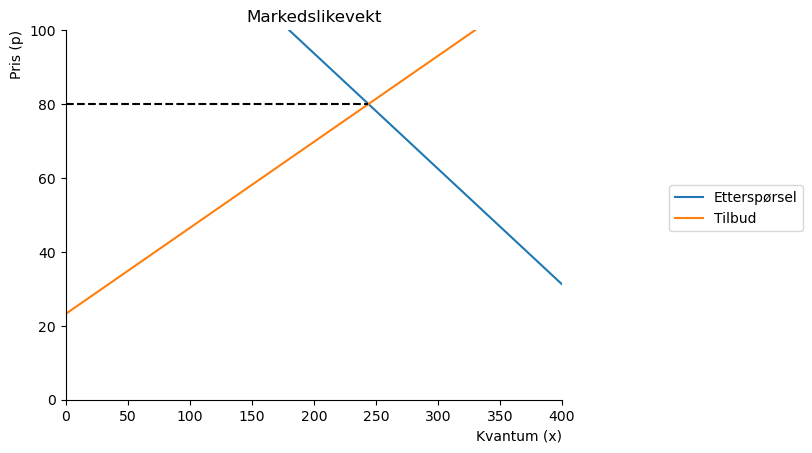

In [8]:
x_num=np.linspace(0.1,100,100)

#lag en akse

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top')
                ax.set_xlabel('Kvantum (x)', loc='right')
                ax.set(xlim=(0,400))
                ax.set(ylim=(0,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax


                #ax.set(xlim=(100,400))
                #ax.set(ylim=(40,100))

fig, ax = create_ax()

# plott funksjonen

ax.plot(demand(x_num), x_num, label='Etterspørsel')
#ax.plot(supply(x_num, 4), x_num, label='Tilbud med avgift')
ax.plot(supply(x_num, 0), x_num, label='Tilbud')





ax.hlines(p_eq_fn_uten_avgift,0,x_eq_fn_uten_avgift, color='black',ls='dashed')
#ax.vlines(x_eq_fn_uten_avgift,0,p_eq_fn_uten_avgift, color='black',ls='dashed')

#ax.vlines(x_eq_fn_med_avgift,0,p_eq_fn_med_avgift, color='black',ls='dashed')
#ax.hlines(p_eq_fn_med_avgift,0,x_eq_fn_med_avgift, color='black',ls='dashed')


# tittel
ax.set_title('Markedslikevekt')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));

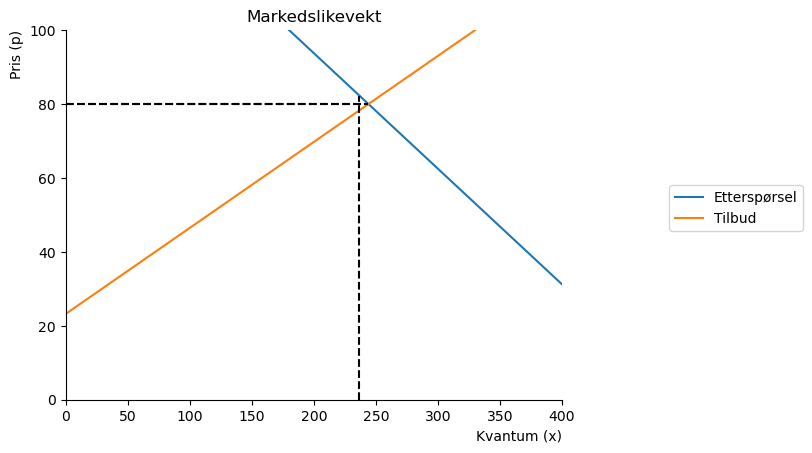

In [9]:
q = np.linspace(0,p_eq_fn_uten_avgift,100)

ax.vlines(x_eq_fn_med_avgift,0,p_eq_fn_med_avgift, color='black',ls='dashed')
ax.hlines(p_eq_fn_uten_avgift,0,x_eq_fn_uten_avgift, color='black',ls='dashed')
ax.legend(bbox_to_anchor=(1.5,0.6))

fig



In [10]:
print(x_eq_fn_uten_avgift, p_eq_fn_uten_avgift)


244.0 80.0


244.0 80.0


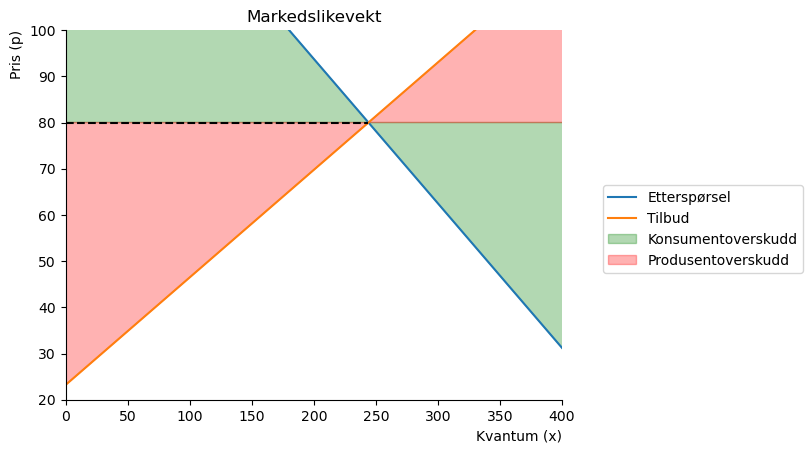

In [171]:
x_num=np.linspace(0.1,100,100)
q = np.linspace(0,p_eq_fn_uten_avgift,100)


b = np.linspace(0,x_eq_fn_uten_avgift,100)


#lag en akse

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top')
                ax.set_xlabel('Kvantum (x)', loc='right')
                ax.set(xlim=(0,400))
                ax.set(ylim=(20,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax


                #ax.set(xlim=(100,400))
                #ax.set(ylim=(40,100))

fig, ax = create_ax()

# plott funksjonen

ax.plot(demand(x_num), x_num, label='Etterspørsel')
#ax.plot(supply(x_num, 4), x_num, label='Tilbud med avgift')
ax.plot(supply(x_num, 0), x_num, label='Tilbud')





ax.hlines(p_eq_fn_uten_avgift,0,x_eq_fn_uten_avgift, color='black',ls='dashed')
#ax.vlines(x_eq_fn_uten_avgift,0,p_eq_fn_uten_avgift, color='black',ls='dashed')

#ax.vlines(x_eq_fn_med_avgift,0,p_eq_fn_med_avgift, color='black',ls='dashed')
#ax.hlines(p_eq_fn_med_avgift,0,x_eq_fn_med_avgift, color='black',ls='dashed')


# tittel
ax.set_title('Markedslikevekt')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));




q = np.linspace(0,x_eq_fn_uten_avgift,100)


ax.fill_between(demand(q), p_eq_fn_uten_avgift, q, color = "green",alpha = 0.3,label='Konsumentoverskudd')
ax.fill_between(supply(q, 0), q, p_eq_fn_uten_avgift, color = "red",alpha = 0.3,label='Produsentoverskudd')

ax.legend(bbox_to_anchor=(1.5,0.6))
print(x_eq_fn_uten_avgift, p_eq_fn_uten_avgift)



244.0 80.0 236.66133333333332 82.29333333333334


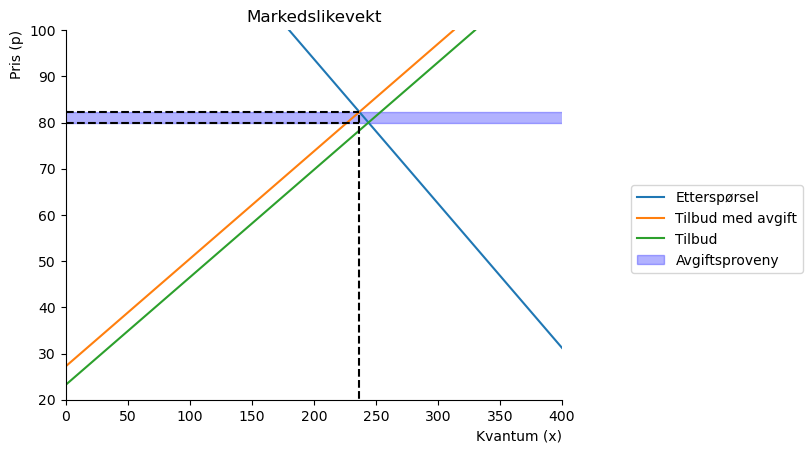

In [172]:
x_num=np.linspace(0.1,100,100)
q = np.linspace(0,p_eq_fn_uten_avgift,100)


b = np.linspace(0,x_eq_fn_uten_avgift,100)


#lag en akse

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top')
                ax.set_xlabel('Kvantum (x)', loc='right')
                ax.set(xlim=(0,400))
                ax.set(ylim=(20,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax


                #ax.set(xlim=(100,400))
                #ax.set(ylim=(40,100))

fig, ax = create_ax()

# plott funksjonen

ax.plot(demand(x_num), x_num, label='Etterspørsel')
ax.plot(supply(x_num, 4), x_num, label='Tilbud med avgift')
ax.plot(supply(x_num, 0), x_num, label='Tilbud')





ax.hlines(p_eq_fn_uten_avgift,0,x_eq_fn_med_avgift, color='black',ls='dashed')
#ax.vlines(x_eq_fn_uten_avgift,0,p_eq_fn_uten_avgift, color='black',ls='dashed')

ax.vlines(x_eq_fn_med_avgift,0,p_eq_fn_med_avgift, color='black',ls='dashed')
ax.hlines(p_eq_fn_med_avgift,0,x_eq_fn_med_avgift, color='black',ls='dashed')


# tittel
ax.set_title('Markedslikevekt')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));




q = np.linspace(0,x_eq_fn_uten_avgift,100)


ax.fill_between(supply(q, 4), p_eq_fn_uten_avgift, p_eq_fn_med_avgift, color = "blue",alpha = 0.3,label='Avgiftsproveny')

ax.legend(bbox_to_anchor=(1.5,0.6))
print(x_eq_fn_uten_avgift, p_eq_fn_uten_avgift, x_eq_fn_med_avgift, p_eq_fn_med_avgift)

